In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Data Reading

In [69]:
train = pd.read_csv("/kaggle/input/iris/Iris.csv")

# Summary of the data

In [70]:
summary.head(10)

,0,null,unique,first
Id,int64,0,150,1
SepalLengthCm,float64,0,35,5.1
SepalWidthCm,float64,0,23,3.5
PetalLengthCm,float64,0,43,1.4
PetalWidthCm,float64,0,22,0.2
Species,object,0,3,Iris-setosa


In [71]:
summary = pd.DataFrame(train.dtypes)
summary["null"] = train.isnull().sum()
summary["unique"] = train.nunique()
summary["first"] = train.loc[0,:]
summary

,0,null,unique,first
Id,int64,0,150,1
SepalLengthCm,float64,0,35,5.1
SepalWidthCm,float64,0,23,3.5
PetalLengthCm,float64,0,43,1.4
PetalWidthCm,float64,0,22,0.2
Species,object,0,3,Iris-setosa


So we can see from the data that there are no null values and there are three kind of specific species. We do not need Id, we also need to remove the species and keep it seperately. There are in total 150 unique items present with theire specifications.

##### Drop the ID

In [72]:
train = train.drop("Id", axis = 1)

In [73]:
def get_row_col_idx(idx):
    """ get the row and column index based on the index to plot on subplots"""
    row_idx = idx//2
    if(idx%2 == 0):
        col_idx = 0
    else :
        col_idx = 1
    return (row_idx, col_idx)

# Univariate analysis

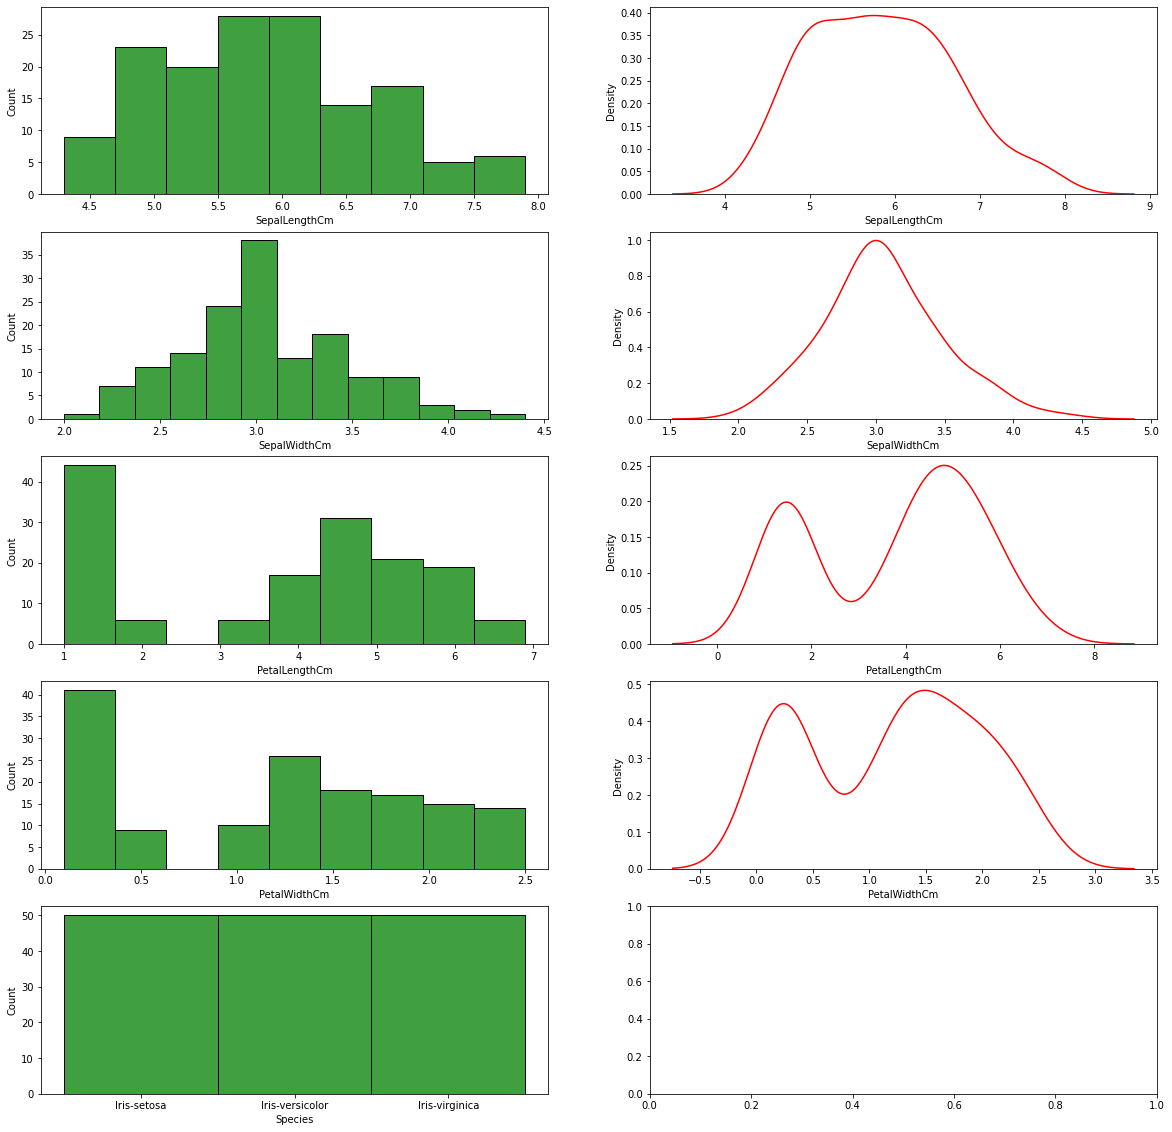

In [74]:
fig, axes = plt.subplots(5, 2, figsize= (20,20))
for idx, val in enumerate(train.columns.to_list()):
    sns.histplot(x = val, data = train, ax = axes[idx][0], color="green")
    if(idx <= 3): # Because target is categorical so just wanna be safe
        sns.kdeplot(x = val, data = train, ax = axes[idx][1], color = "red")

From above plots we can see that the species are distributed equally in the data. Distribution of Sepal width is normal and sepal length is near to normal


# Multivariate Analysis

In [75]:
target = train.pop("Species") # Extracting target feature!

#### Relation between SepalLength and SepalWidth

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

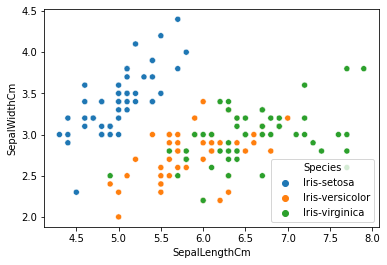

In [76]:
sns.scatterplot(x= 'SepalLengthCm', y= 'SepalWidthCm', hue= target, data=train)

We can see that based on sepal length and sepal width, setosa is pretty much linearly seperable from others

#### Relation between PetalLength and PetalWidth

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

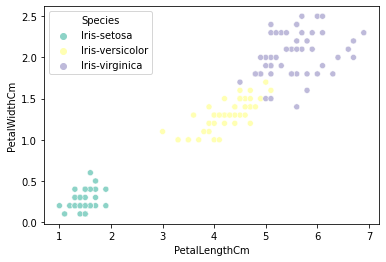

In [77]:
sns.scatterplot(x= 'PetalLengthCm', y= 'PetalWidthCm', hue= target, data=train, palette="Set3")

Based on petal width and petal length the species are seperable better so if decision is made on the basis of petal length and petal width it would give a better clarity to the classifier

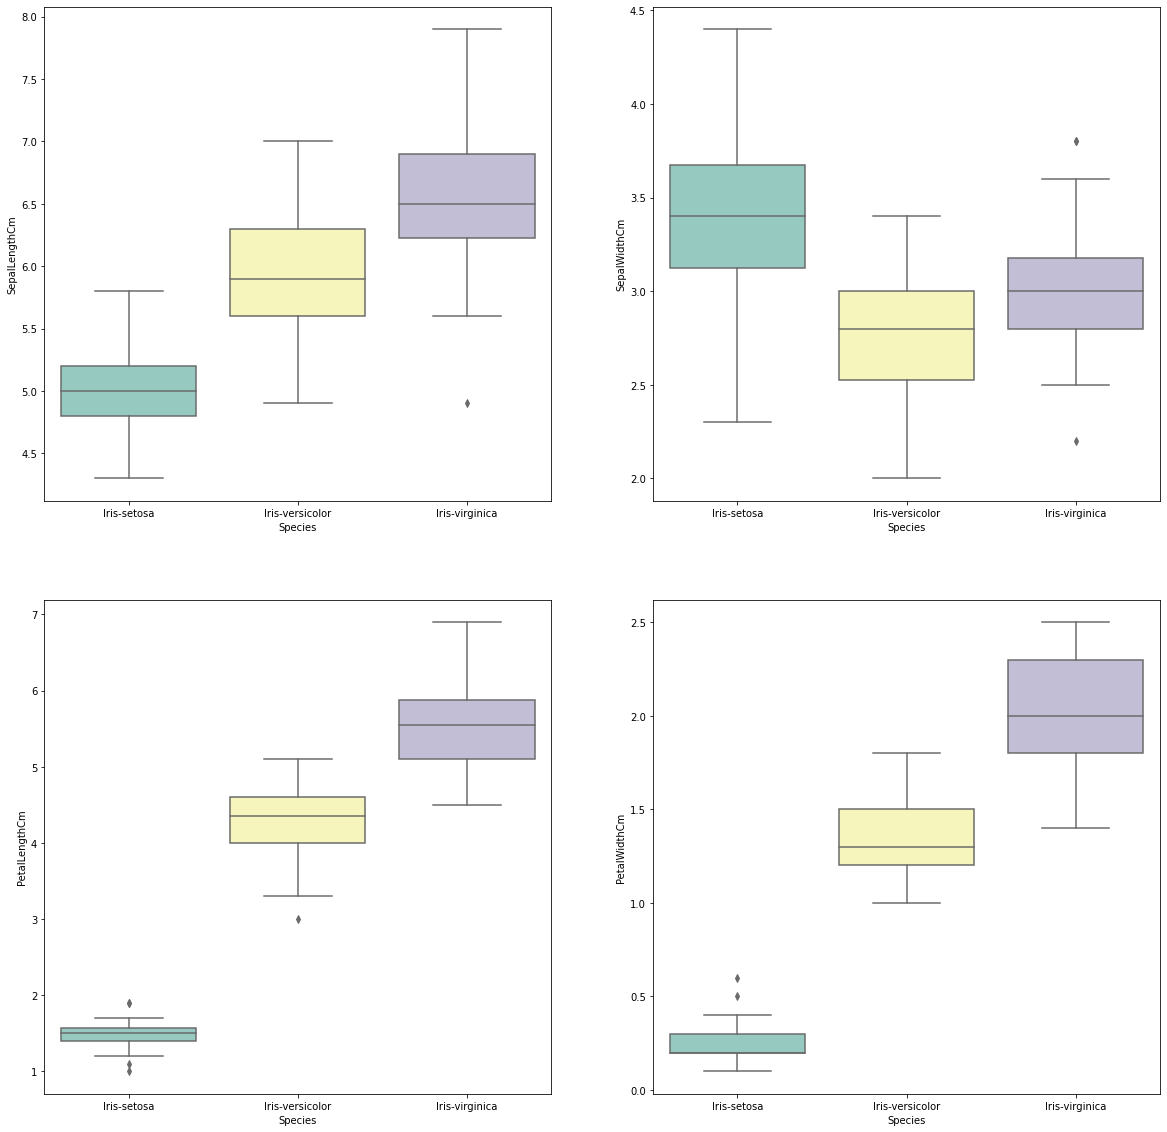

In [78]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
for idx, vals in enumerate(train.columns.to_list()):
    row_idx, col_idx = get_row_col_idx(idx)
    sns.boxplot(x = target, y = vals, data = train, ax = axes[row_idx, col_idx], palette="Set3")

With increasing sepal length, petal length and petal width, the species are quite nicely categorised.
Sepal width on the other hand follows a decreasing trend and then increasing trend.

# Split the data

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0, test_size =0.2)

### Encoding the data

In [80]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

### Training Model

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



#### Confusion Matrix!

Confusion Matrix is : 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


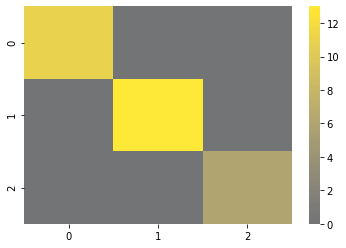

In [82]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True,cmap='cividis')
plt.show()